<a href="https://colab.research.google.com/github/inoueshinji8/PythonStudy/blob/main/quantum_chemistry1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

まずは水素原子のシュレディンガー方程式を解くことに

https://tsujimotter.hatenablog.com/entry/quantum-mechanics-and-visualization-of-spherical-harmonics
の丸写しで仕方ない

シュレディンガー方程式だ、ハミルトニアンだ、ディラック定数だ、プランク定数だ、<br>
変数分離だ、動径波動関数だ、球面調和関数だ、<br>
方位角の式は簡単だが係数が整数でないと周期性が無い、極角の式は方位量子数とかルジャンドルの陪多項式とか出るぞ、<br>
動径の式は主量子数に対応するEnにだけ対応しエネルギーが飛び飛びになる、将来的にはパウリの排他律で同じ電子軌道には2つまでしか入らない、<br>
あとは
https://www.comp.tmu.ac.jp/hyodo/class/2020/QM2/QM2_Note6.pdf
でも見ておく<br>
球ベッセル関数と球ノイマン関数<br>

ただし最初のサイトではrはとりあえず忘れてθとφだけにする、とある<br>
3次元空間で動かすので波動関数の絶対値の2乗だけをプロットすると

球面調和関数はYlmとか更にエネルギー順位もnで飛び飛び<br>
ここでnを主量子数として、1,2,3...で調べる

主量子数n=1がK殻、n=2がL殻、n=3がM殻<br>
方位量子数l=0がs軌道、l=1がp軌道、l=2がd軌道<br>

この辺が場合分けされる要素になる

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

import math

In [2]:
# 球面調和関数（ただし、実関数表示したもの）
def spherical_harmonics(theta, phi, l, m):
    if l == 0:
        if m == 0:
            # l=0, m=0
            return np.sqrt(1.0/(4*np.pi))
    if l == 1:
        if m == 0:
            # l=1, m=0
            return np.sqrt(3.0/(4.0*np.pi)) * np.cos(theta)
        if m == 1:
            # l=1, m=+1
            return np.sqrt(3.0/(4.0*np.pi)) * np.sin(theta) * np.cos(phi)
        if m == -1:
            # l=1, m=+1
            return np.sqrt(3.0/(4.0*np.pi)) * np.sin(theta) * np.sin(phi)
    if l == 2:
        if m == 0:
            return np.sqrt(5.0/(16.0*np.pi)) * (3.0*(np.cos(theta)**2) - 1.0)
        if m == 1:
            return np.sqrt(15.0/(4.0*np.pi)) * np.cos(theta) * np.sin(theta) * np.cos(phi)
        if m == -1:
            return np.sqrt(15.0/(4.0*np.pi)) * np.cos(theta) * np.sin(theta) * np.sin(phi)
        if m == 2:
            return np.sqrt(15.0/(16.0*np.pi)) * (np.sin(theta)**2) * np.cos(2*phi)
        if m == -2:
            return np.sqrt(15.0/(16.0*np.pi)) * (np.sin(theta)**2) * np.sin(2*phi)

In [3]:
names = [["s"], ["p_y", "p_z", "p_x"], ["d_{xy}", "d_{yz}", "d_{z^2}", "d_{zx}", "d_{x^2-y^2}"]]

In [4]:
theta, phi = np.linspace(0, np.pi, 40), np.linspace(0, 2 * np.pi, 80)
THETA, PHI = np.meshgrid(theta, phi)

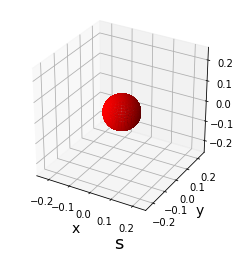

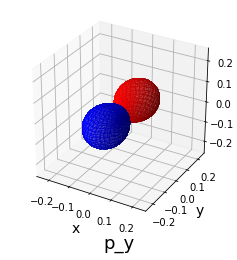

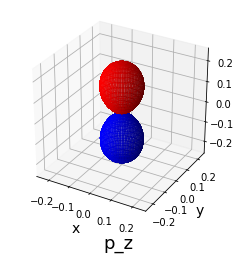

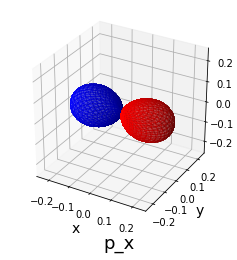

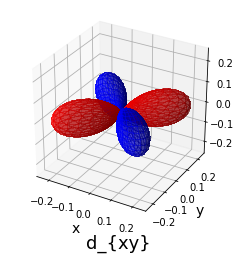

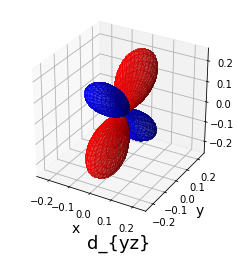

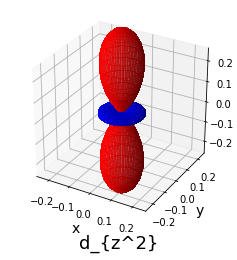

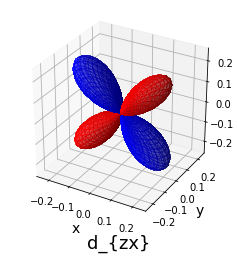

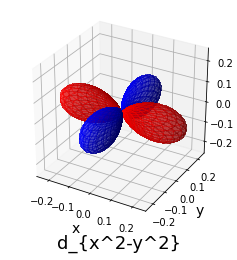

In [5]:
for l in range(3):
    for m in range(-l,l+1):
        fig = plt.figure(figsize=(4.0, 4.0))
        ax = fig.add_subplot(1,1,1, projection='3d')
        
        # 図のタイトルをイイ感じの場所に
        ax.set_title("{}".format( names[l][l+m] ), y=-0.15, size = 18)

        R = spherical_harmonics(THETA, PHI, l, m)**2
        X = R * np.sin(THETA) * np.cos(PHI)
        Y = R * np.sin(THETA) * np.sin(PHI)
        Z = R * np.cos(THETA)
        
        # 軸の設定
        ax.set_xlabel("x", size = 14)
        ax.set_ylabel("y", size = 14)
        ax.set_zlabel("z", size = 14)
        
        # x,y,zの表示範囲を設定
        ax.set_xlim3d(-0.25,0.25)
        ax.set_ylim3d(-0.25,0.25)
        ax.set_zlim3d(-0.25,0.25)
        
        # 色付けのルールを設定
        colortuple = ('r','b')
        COLORS = np.empty(THETA.shape, dtype=str)
        for y in range(PHI.shape[1]):
            for x in range(PHI.shape[0]):
                th = THETA[x,y]
                ph = PHI[x,y]
                if spherical_harmonics(th, ph, l, m) > 0:
                    # 球面調和関数の値が正であれば「赤」
                    COLORS[x, y] = colortuple[0]
                else:
                    # 球面調和関数の値が負であれば「青」
                    COLORS[x, y] = colortuple[1]
        
        # (l, m) に対応するグラフをプロット
        plot = ax.plot_surface(
            X, Y, Z,facecolors=COLORS, rstride=1, cstride=1,
            linewidth=0, antialiased=False, alpha=0.5)
        
        # ファイルを保存する
        plt.savefig("{}.jpg".format(names[l][l+m]),dpi=240)
        # グラフを表示
        plt.show()

続いては
https://tsujimotter.hatenablog.com/entry/visualization-of-atomic-orbitals<br>
日曜化学(2)：3次元空間における電子雲の計算（Python/matplotlib）
との事
まあ頑張って勉強するか